# Доверительные интервалы для оценки среднего

In [28]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генерация данных

In [30]:
blobs = datasets.make_blobs(300, centers = 2, cluster_std = 6, random_state=1)

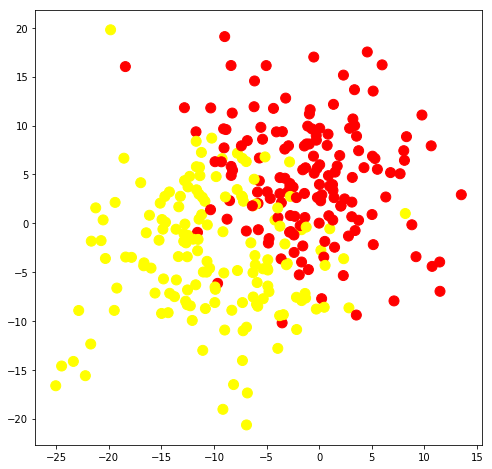

In [31]:
pylab.figure(figsize(8, 8))
pylab.scatter(list(map(lambda x: x[0], blobs[0])), list(map(lambda x: x[1], blobs[0])), c = blobs[1], 
              cmap = 'autumn', s = 100)

## Сравнение линейных моделей

### Точечная оценка

In [32]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 15,
                                                                                    random_state = 1)

In [33]:
ridge_model = linear_model.RidgeClassifier()
ridge_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, ridge_model.predict(test_data))

0.8888888888888888

In [34]:
sgd_model = linear_model.SGDClassifier(max_iter = 1000, tol = 1e-3)
sgd_model.fit(train_data, train_labels)
metrics.roc_auc_score(test_labels, sgd_model.predict(test_data))

0.8888888888888888

### Оценка среднего

In [35]:
sgd_auc_scores = model_selection.cross_val_score(linear_model.SGDClassifier(max_iter = 1000, tol = 1e-3), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

In [36]:
ridge_auc_scores = model_selection.cross_val_score(linear_model.RidgeClassifier(), 
                                 blobs[0], blobs[1], scoring = 'roc_auc',  
                                 cv = 20)

### Точечная оценка среднего

In [37]:
print("sgd model auc: mean %.3f, std %.3f" % (sgd_auc_scores.mean(), sgd_auc_scores.std()))
print("ridge model auc: mean %.3f, std %.3f" % (ridge_auc_scores.mean(), ridge_auc_scores.std()))

sgd model auc: mean 0.861, std 0.210
ridge model auc: mean 0.948, std 0.052


### Интервальная оценка среднего 

In [38]:
from statsmodels.stats.weightstats import zconfint, _zconfint_generic, _tconfint_generic

In [ ]:
sgd_mean = sgd_auc_scores.mean()
ridge_mean = ridge_auc_scores.mean()

#### z-интервал

Допустим, нам откуда-то известно, что дисперсия auc_scores $\sigma^2=0.25$. Построим доверительные интервалы для средних вида $$\bar{X}_n \pm z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}$$

In [39]:
print("sgd model mean auc confidence interval", _zconfint_generic(sgd_mean, sqrt(0.25/len(sgd_auc_scores)), 0.05, 'two-sided'))
print("ridge model mean auc confidence interval", _zconfint_generic(ridge_mean, sqrt(0.25/len(sgd_auc_scores)), 0.05, 'two-sided'))

sgd model mean auc confidence interval (0.697546660774222, 1.1358079310625127)
ridge model mean auc confidence interval (0.728860436284426, 1.1671217065727166)


#### t-интервал

Вместо гипотетической теоретической дисперсии $\sigma^2$, которую мы на самом деле в данном случае не знаем, используем выборочные дисперсии, и построим доверительные интервалы вида $$\bar{X}_n \pm t_{1-\frac{\alpha}{2}} \frac{S}{\sqrt{n}}$$

In [40]:
sgd_mean_std = sgd_auc_scores.std()/sqrt(len(sgd_auc_scores))
ridge_mean_std = ridge_auc_scores.std()/sqrt(len(ridge_auc_scores))

In [41]:
print("sgd model mean auc confidence interval", _tconfint_generic(sgd_mean, sgd_mean_std,
                                                                    len(sgd_auc_scores) - 1,
                                                                    0.05, 'two-sided'))
print("ridge model mean auc confidence interval", _tconfint_generic(ridge_mean, ridge_mean_std,
                                                                      len(sgd_auc_scores) - 1,
                                                                      0.05, 'two-sided'))

sgd model mean auc confidence interval (0.818583479111412, 1.0147711127253227)
ridge model mean auc confidence interval (0.923514194847992, 0.9724679480091506)
